<a href="https://colab.research.google.com/github/DesaData/DesaData/blob/main/QuantileRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#iimport libraries#
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
%matplotlib in line

UsageError: unrecognized arguments: line


In [ ]:
data = sm.datasets.engel.load_pandas().data
data.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


In [ ]:
#Least Absolute deviation# - minimizes the sum of absolute deviations and alternative to least squares used in linear regression#
#Formula 'foodexp~income'specifies that you’re modeling the dependent variable foodexp as a linear function of the independent variable income#

In [ ]:
model = smf.quantreg('foodexp~income', data) #setting up the relationship between food and income using quantile regression#
res = model.fit(q=0.5)#fit specifically to 0.5( MEDIAN)which provides more central tendency on the relationship#
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                foodexp   Pseudo R-squared:               0.6206
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Tue, 21 May 2024   No. Observations:                  235
Time:                        12:32:04   Df Residuals:                      233
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4823     14.634      5.568      0.000      52.649     110.315
income         0.5602      0.013     42.516      0.000       0.534       0.586
==============================================================================

The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#R2 is closer to 1 at 0.6 showing the data is fittes well.


In [ ]:
quantiles  = np.arange( .05, .96, .1)#array of quantiles from 0.5 to 0.96#
def fit_models(q):
  res = model.fit(q=q) # This means q will be replaced with the desired quantile#
  return[q, res.params['Intercept'], res.params['income']] + res.conf_int().loc['income'].tolist()
  #Confidence level lies within the minimum range and max range hence the effect of income lies within that interval#

models = [fit_models(x) for x in quantiles]#Listing models to different quantiles
models = pd.DataFrame(models, columns=["q","a","b","c","d"])

ols = smf.ols("foodexp~income", data).fit() #Fitting Ordinary Least Squares#
ols_ci = ols.conf_int().loc['income'].tolist() #presents the confidence interval for the coefficient of the ‘income’ variable#
ols_dict = dict(a=ols.params['Intercept'],  #represents the expected value of the dependent variable when all other predictors are zero#
                b=ols.params['income'], #change in the dependent variable associated with a one-unit increase in income#
                c = ols_ci[0], #lower bound of the confidence interval for the ‘income’ coefficient.#
                d = ols_ci[1])#upper bound of the confidence interval for the ‘income’ coefficient#

Text(0, 0.5, 'Food Expenditure')

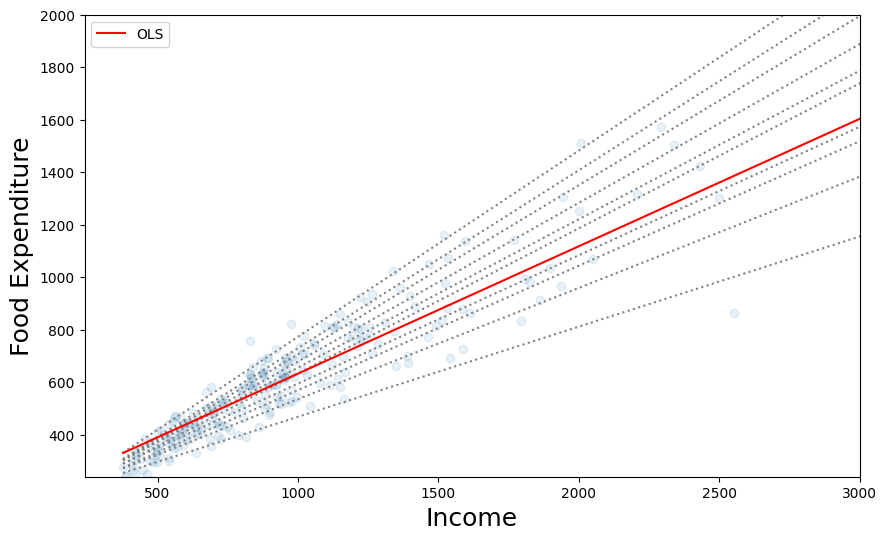

In [ ]:
#Plot#
x = np.arange(data.income.min(), data.income.max(), 50)
get_y = lambda a, b : a + b * x # Linear Equation  y(foodex) = a(intercept others are 0) + b(Coefficeient) x(Income)
fig, ax = plt.subplots(figsize=(10,6)) #Will bring the plot though with no axes#

for i in range(models.shape[0]):
   y = get_y(models.a[i], models.b[i])
   ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols_dict['a'], ols_dict['b'])
ax.plot(x, y, color='red', label='OLS')
ax.scatter(data.income, data.foodexp, alpha=0.1)
ax.set_xlim((240, 3000))
ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel('Income', fontsize=18)
ax.set_ylabel('Food Expenditure', fontsize=18)